In [5]:
#!conda install -c conda-forge pyhrv

In [6]:
#!pip install --upgrade pyhrv

In [7]:
# Importar las bibliotecas necesarias
from pyhrv.hrv import hrv
from opensignalsreader import OpenSignalsReader
from biosppy.signals.ecg import ecg

Procesando archivo: OpenSignals/ECG/ECG_imagen1.txt


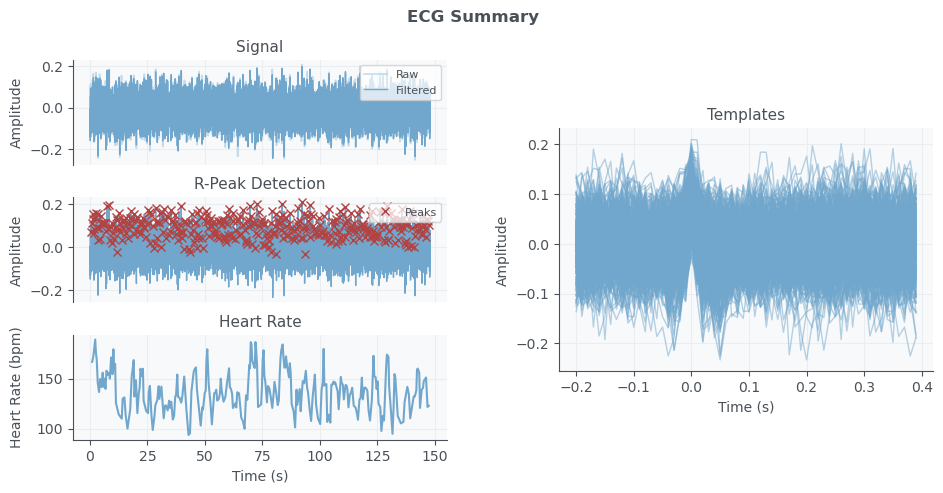

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


Se produjo un error: Invalid data type. Please provide data in int, float, list or numpy array format.

Procesando archivo: OpenSignals/ECG/ECG_sonido_imagen1.txt


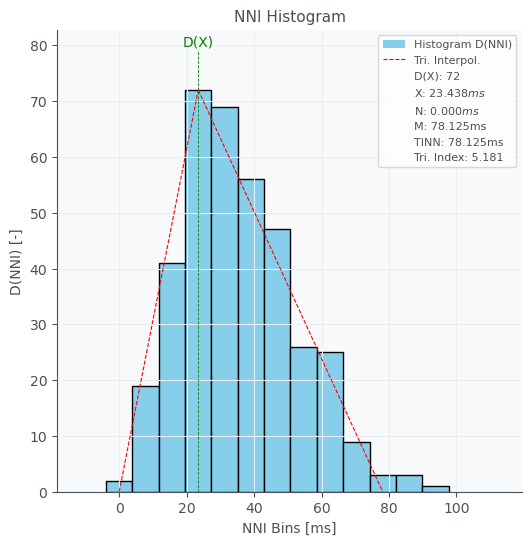

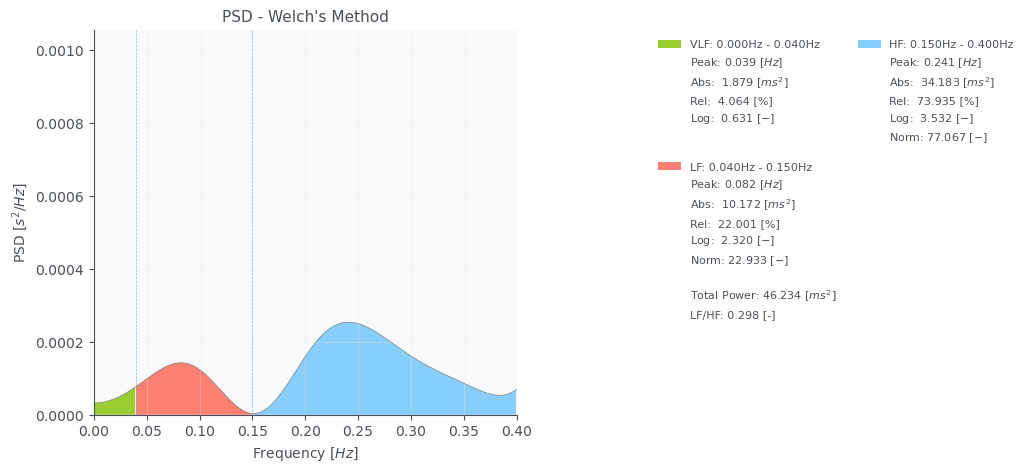

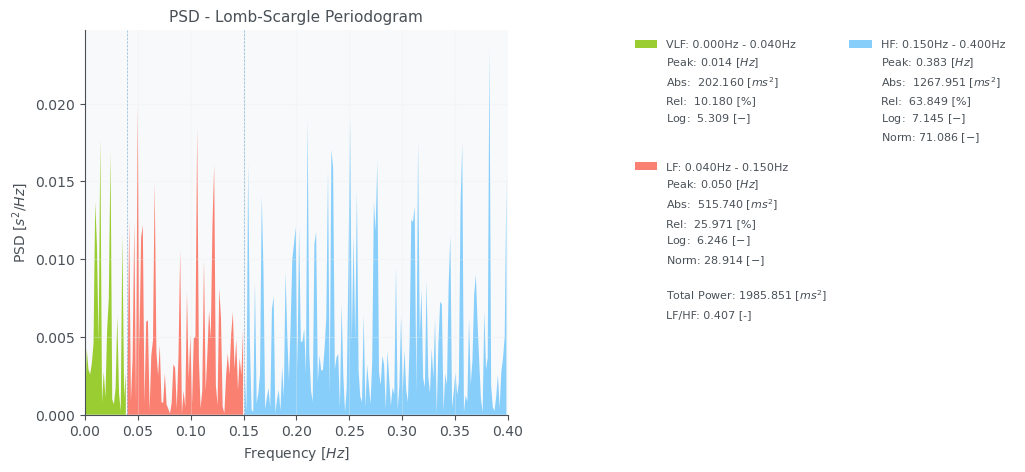

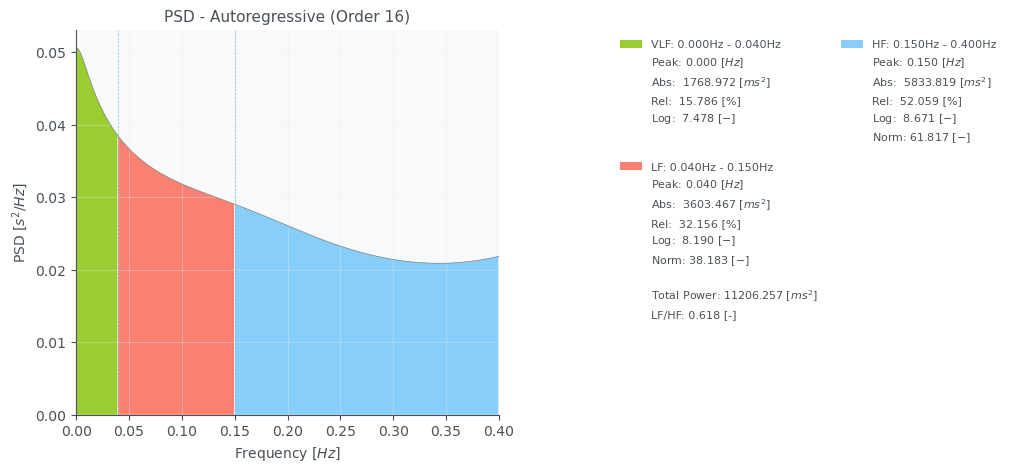

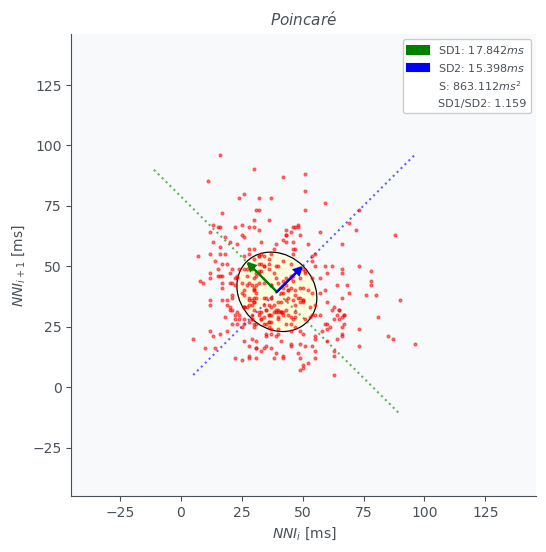

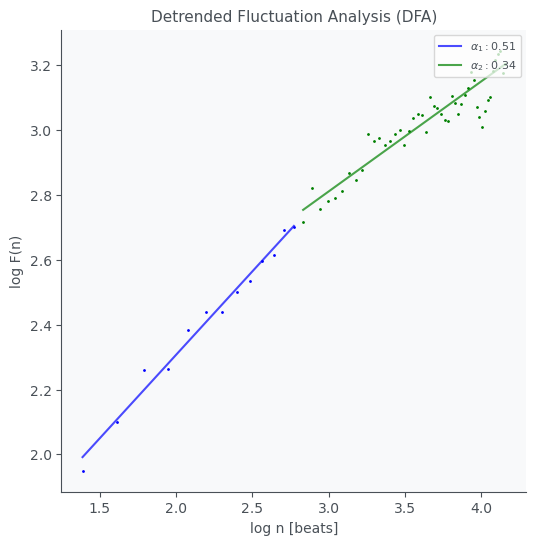

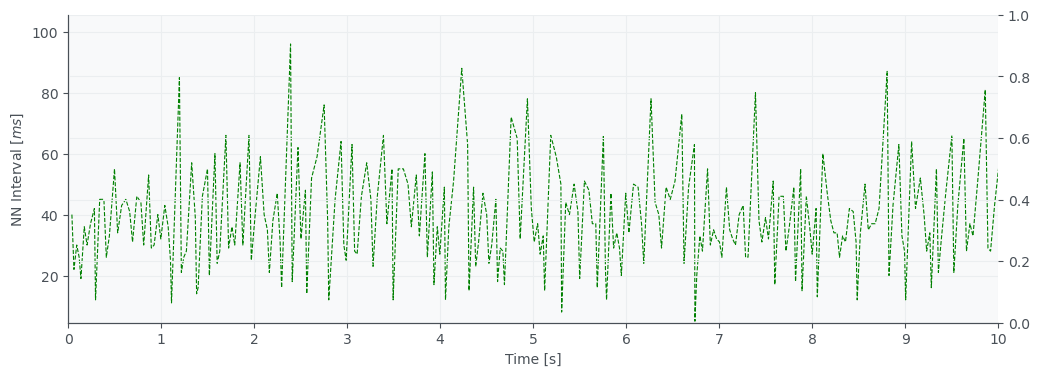

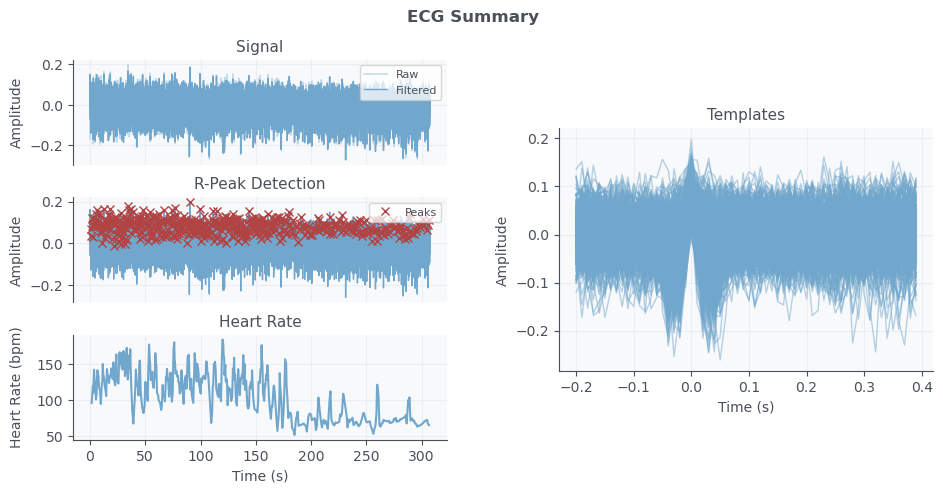

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


Se produjo un error: Invalid data type. Please provide data in int, float, list or numpy array format.

Procesando archivo: OpenSignals/ECG/ECG_sonido1.txt


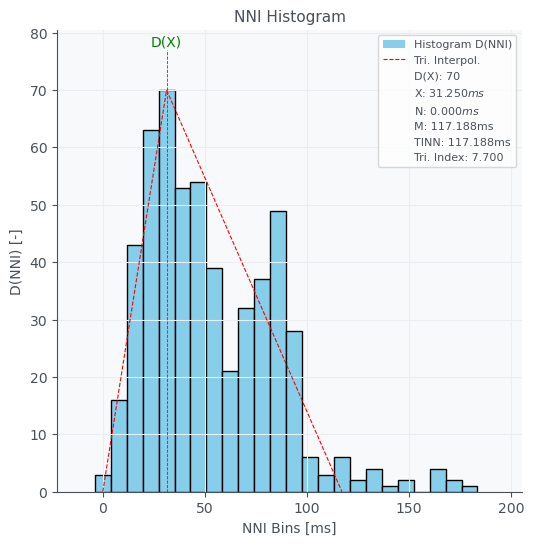

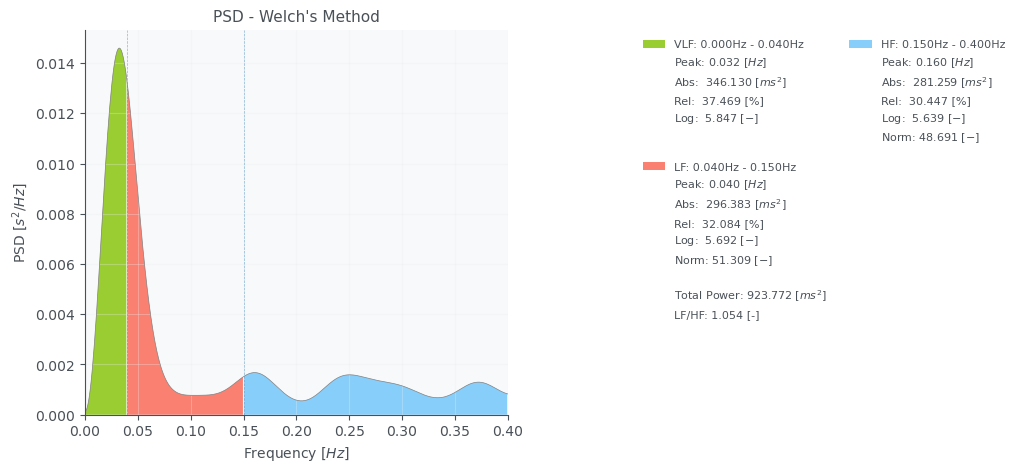

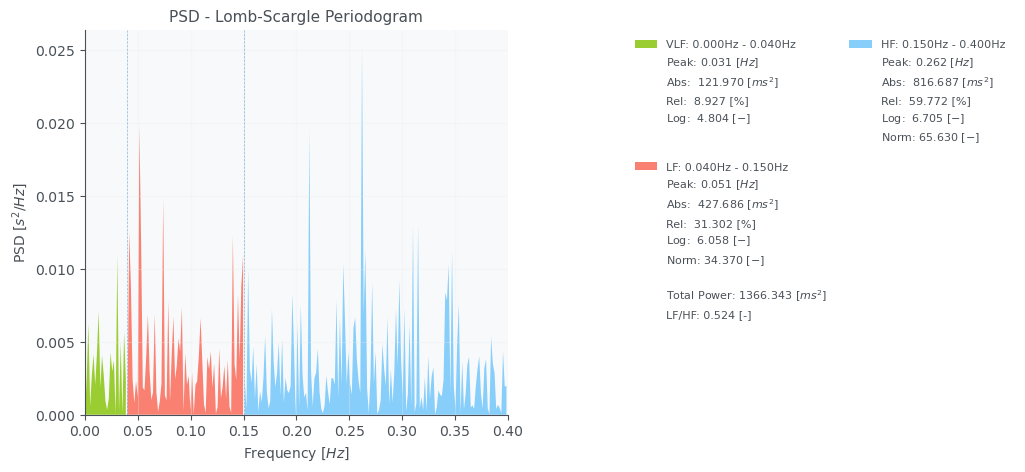

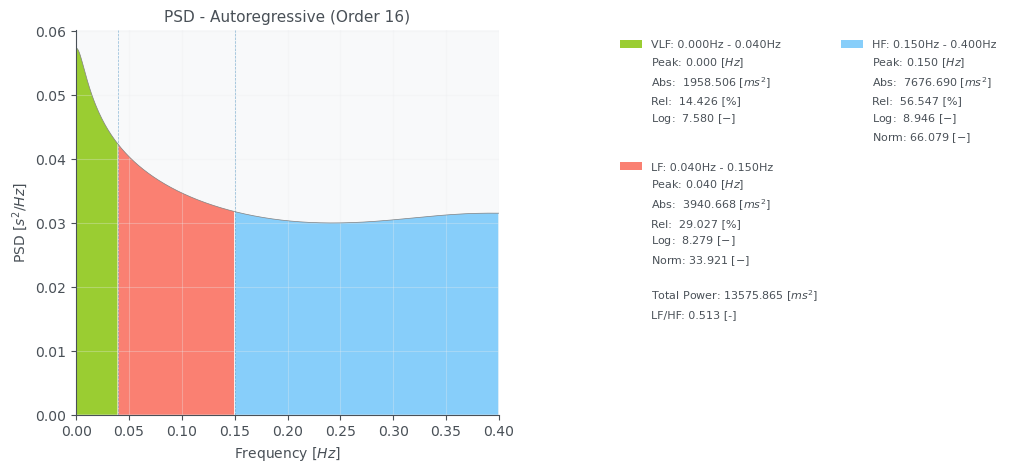

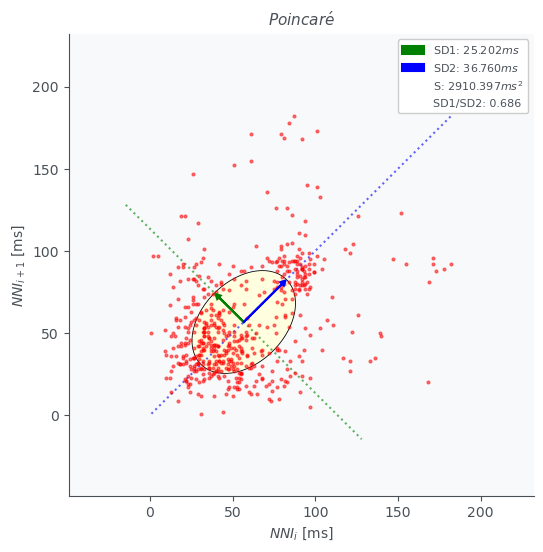

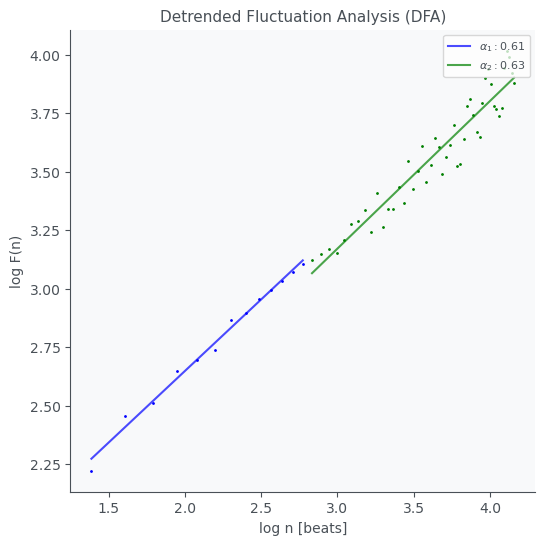

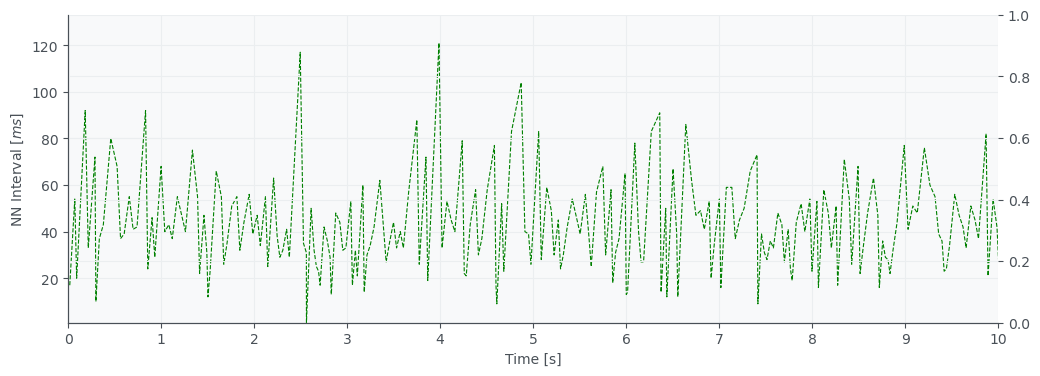

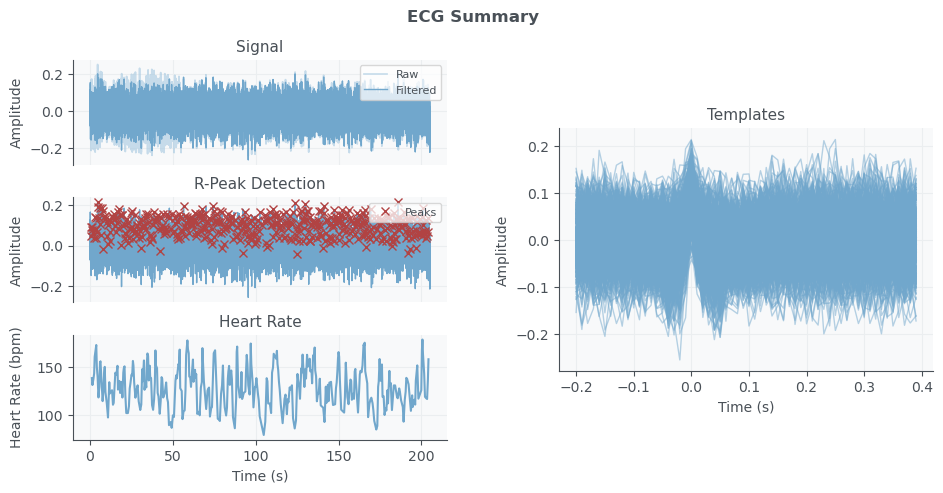

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


Se produjo un error: Invalid data type. Please provide data in int, float, list or numpy array format.



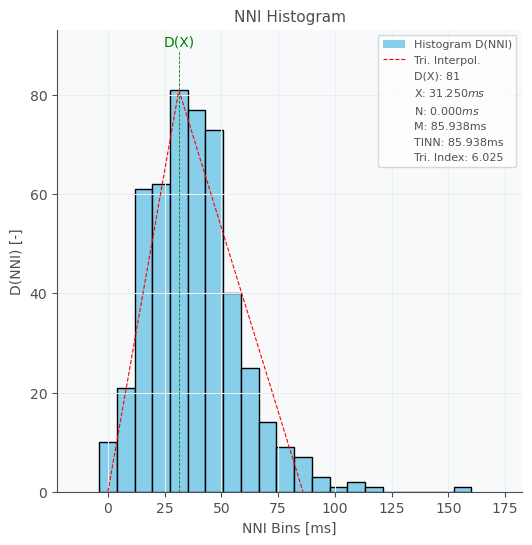

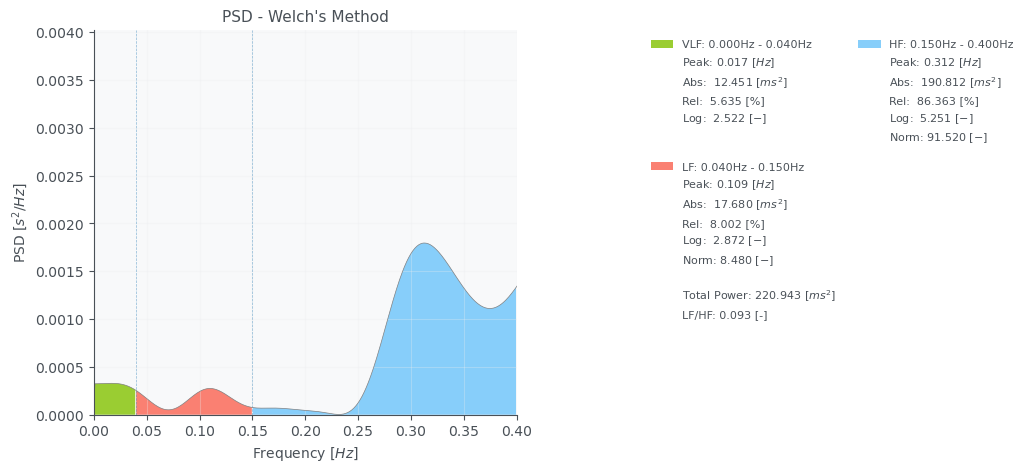

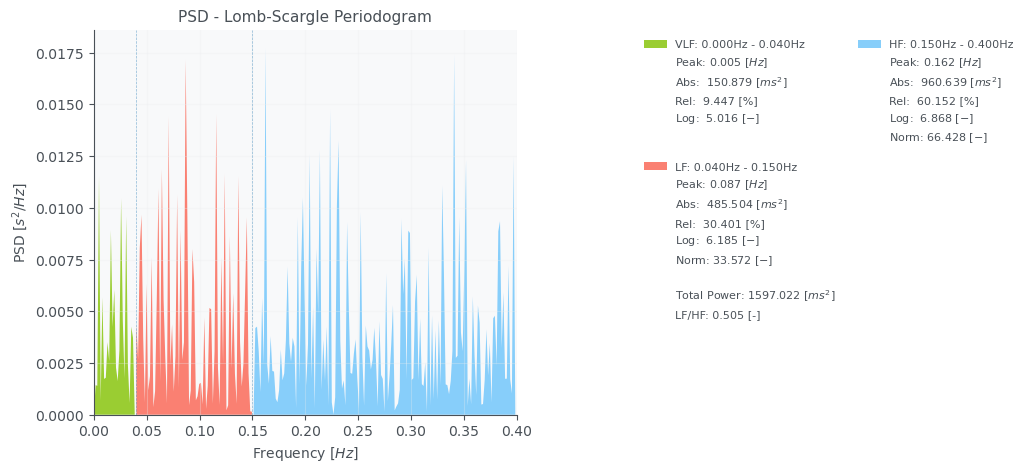

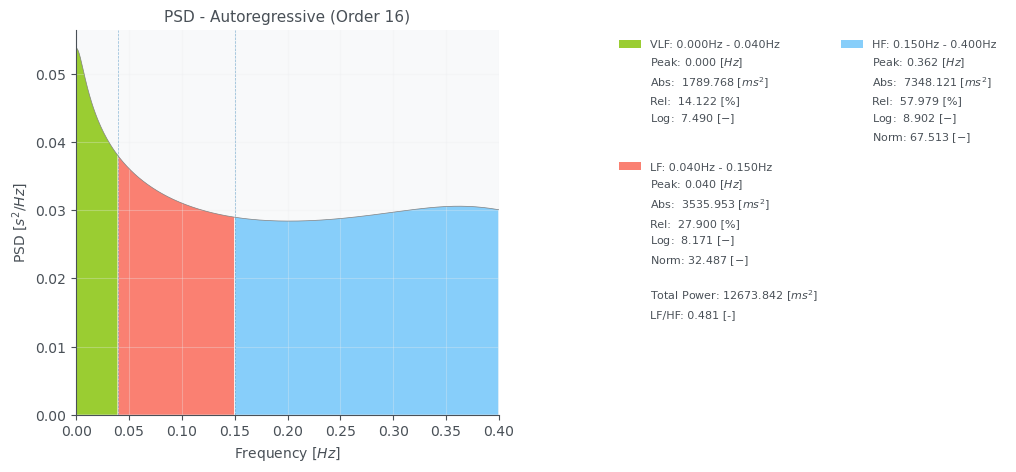

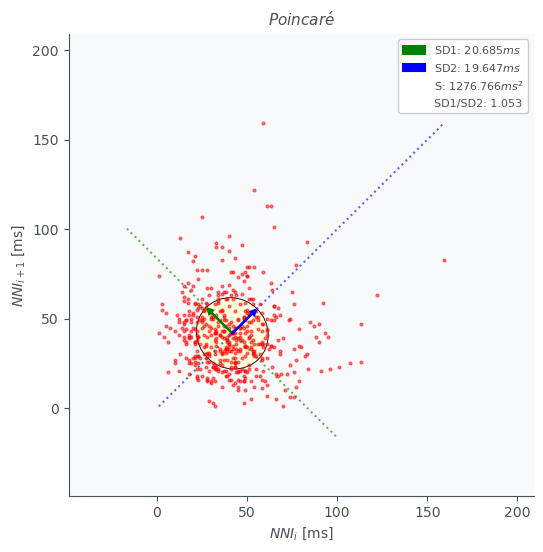

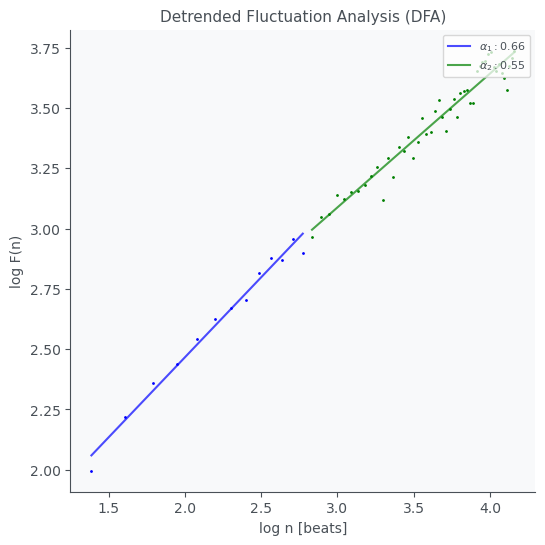

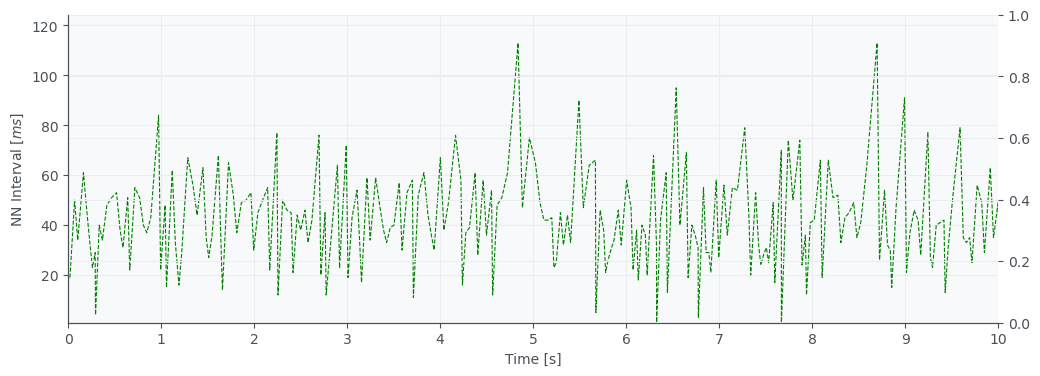

In [8]:
def process_files(file_paths):
    for fpath in file_paths:
        print("Procesando archivo:", fpath)
        try:
            # Cargar el archivo de adquisición
            acq = OpenSignalsReader(fpath)

            # Obtener la señal de ECG
            signal = acq.signal('ECG')

            # Filtrar la señal de ECG y extraer los picos R
            processed_ecg = ecg(signal, sampling_rate=100)
            rpeaks = processed_ecg['rpeaks']
            rpeaks = list(rpeaks)

            # Calcular todos los parámetros de HRV con los picos R y la señal filtrada
            results = hrv(rpeaks=rpeaks)

            # Imprimir todos los parámetros individualmente
            for key in results.keys():
                print(key, results[key])

        except Exception as e:
            print("Se produjo un error:", e)
            print()

# Lista de rutas de archivos
file_paths = ['OpenSignals/ECG/ECG_imagen1.txt', 'OpenSignals/ECG/ECG_sonido_imagen1.txt', 'OpenSignals/ECG/ECG_sonido1.txt']

# Procesar los archivos
process_files(file_paths)


# Create HRV report in .TXT format
#hrv_report(results, path='/my/favorite/path', rfile='MyFirstHRVReport')

### ECG Summary : Signal, R-peak detection, heart rate, templates

- Signal: Es la representación gráfica de la señal eléctrica del corazón (ECG). Muestra cómo varía la actividad eléctrica del corazón con el tiempo.
- R-peak detection: Son los picos marcados en la señal ECG que representan la activación eléctrica del ventrículo izquierdo del corazón. Estos picos se utilizan para medir la frecuencia cardíaca y calcular diferentes parámetros de variabilidad del ritmo cardíaco.
- Heart rate: Es la frecuencia cardíaca, es decir, el número de latidos del corazón por minuto. Se calcula a partir de los intervalos entre los R-peaks.
- Templates: Son patrones de la señal ECG que se utilizan para identificar anomalías o características específicas en el ritmo cardíaco. Pueden ser útiles en el diagnóstico de enfermedades cardíacas.
    


    

### Histograma de NNI (Normal to Normal Interval) 
Muestra cómo se distribuyen los intervalos NN en diferentes rangos de tiempo (bins) y cuántas veces ocurre cada intervalo, lo que proporciona información sobre la variabilidad del ritmo cardíaco en función de la frecuencia de los intervalos en diferentes rangos.

- Eje x: Los bins de intervalo NN representan intervalos de tiempo discretos en milisegundos. Cada bin abarca un rango específico de intervalos NN. Por ejemplo, puede haber un bin para intervalos entre 700 y 800 ms, otro para intervalos entre 800 y 900 ms, y así sucesivamente. Estos bins dividen el rango completo de intervalos NN en intervalos más pequeños para que se pueda construir el histograma.

- Eje y: La D(NN) representa la desviación estándar de los intervalos NN, que es una medida de la variabilidad del ritmo cardíaco. En el histograma de NNi, la D(NN) se muestra en el eje y como la frecuencia de ocurrencia de los intervalos NN en cada bin. La altura de cada barra en el histograma indica cuántos intervalos NN caen dentro de ese rango específico de bins.

Los datos de la leyenda:
La linea discontinua roja representa la interpolación de los datos. La interpolación es un método para estimar valores desconocidos entre puntos conocidos en una serie de datos.

D(X): 72 representa la desviación estándar de los intervalos NN (NNi). La desviación estándar es una medida de dispersión que indica cuánto varían los intervalos NN respecto a la media. En este caso, una desviación estándar de 72 significa que, en promedio, los intervalos NN tienden a desviarse aproximadamente 72 milisegundos de la media. Una desviación estándar más alta indica una mayor variabilidad en los intervalos NN, lo que sugiere que el ritmo cardíaco puede ser menos regular. Por otro lado, una desviación estándar más baja indica una menor variabilidad, lo que sugiere un ritmo cardíaco más regular. 

X: 23.438ms. Este valor indica la media de los intervalos NN en milisegundos. La media es el valor promedio de todos los intervalos NN en el histograma.

N: 0.000ms: Este valor representa el intervalo NN más corto observado en el conjunto de datos.

M: 78.125ms: Este valor representa el intervalo NN más largo observado en el conjunto de datos.

TINN: 78.125ms: Este valor representa el ancho de la base del triángulo del histograma de NNi. TINN significa Triángulo de Integración de la Norma (en inglés, Triangular Interpolation of the NN Interval Histogram). Es una medida de la variabilidad a largo plazo del ritmo cardíaco. Un valor de TINN de 78 ms indica que la base del triángulo en el histograma de los intervalos entre latidos del corazón tiene una amplitud de 78 milisegundos. Esto sugiere que hay una variabilidad moderada en los intervalos entre latidos del corazón a lo largo del tiempo. Una variabilidad moderada generalmente se considera saludable y puede indicar una buena adaptabilidad del sistema cardiovascular a diferentes demandas fisiológicas.

Tri. Index: 5.181: Este valor representa el índice triangular, que es una medida de la relación entre la anchura de la base del triángulo y su altura. Un valor alto indica una distribución más amplia de los intervalos NN, lo que sugiere una mayor variabilidad en el ritmo cardíaco.





### PSD-Welch's method (Power Spectral Density)

Este gráfico muestra cómo la energía de la señal ECG se distribuye en diferentes frecuencias. Permite identificar los ritmos cardíacos dominantes y evaluar la contribución de diferentes ritmos a la variabilidad del ritmo cardíaco. En el contexto del análisis de señales como el ECG (Electrocardiograma), la "energía" se refiere a la cantidad de actividad presente en diferentes frecuencias dentro de la señal. En el dominio de la frecuencia, la energía se puede calcular como el área bajo la curva del espectro de potencia, que representa la distribución de la potencia de la señal en función de la frecuencia.

En el eje x, "Frequency" representa las diferentes frecuencias en hertz (Hz).
En el eje y, "PSD" (Power Spectral Density) representa la densidad espectral de potencia de la señal, lo que indica la cantidad de energía en la señal ECG en función de la frecuencia. La gráfica se divide en tres franjas coloreadas para representar diferentes bandas de frecuencia dentro del espectro de la señal ECG. Cada banda de frecuencia tiene características particulares y contribuye de manera diferente a la variabilidad del ritmo cardíaco. Las características de cada franja signfican:

- Rango de frecuencia: Intervalo de frecuencias (VLF (Very Low Frequency - Frecuencia Muy Baja), LF (Low Frequency - Baja Frecuencia) y HF (High Frequency - Alta Frecuencia)).
- Pico de frecuencia (Peak): Frecuencia del pico de energía dentro del rango de frecuencias considerado.
- Potencia absoluta (Abs): Cantidad total de energía en la señal dentro del rango de frecuencias considerado, medida en milisegundos cuadrados.
- Potencia realtiva (Rel): Proporción de la potencia absoluta dentro del rango de frecuencias considerado en relación con la potencia total de la señal.
- Valor logarítmico (Log): Es el logaritmo de la potencia absoluta en base 10. Proporciona una representación logarítmica de la cantidad de energía en la señal dentro del rango de frecuencias considerado.
- Valor normalizado (Norm): Es la potencia relativa expresada como un porcentaje del total de la potencia de la señal.

Los valores generales "Total Power" es la suma total  de la potencia en todas las bandas de frecuencia, y la relación LF/HF es la relación entre la potencia de baja frecuencia (LF) y la potencia de alta frecuencia (HF).




### PSD- Lomb-Scargle Periodogram

Similar al PSD de Welch, pero adaptado para datos que no son equiespaciados en el tiempo. Es útil cuando los latidos cardíacos no ocurren a intervalos regulares.




### PSD-Autoregressive (Order 16)
Otra forma de visualizar la distribución de la energía de la señal ECG en diferentes frecuencias. Este método se basa en el modelo matemático autoregresivo y puede proporcionar una representación más precisa de la variabilidad del ritmo cardíaco.




### Poincaré
En el gráfico de Poincaré, el eje y representa el intervalo de tiempo entre latidos del corazón sucesivos (NN) en el momento 
i + 1, mientras que el eje x representa el intervalo de tiempo entre latidos del corazón en el momento j.

En términos más simples, cada punto en el gráfico de dispersión representa un par de intervalos de tiempo entre latidos sucesivos. Por ejemplo, si en el eje x tenemos un valor de 800 ms y en el eje y tenemos un valor de 850 ms, esto significa que entre el latido j y el latido i+1 hay un intervalo de 800 ms y 850 ms, respectivamente.

La distribución de estos puntos en el gráfico de dispersión proporciona información sobre la variabilidad del ritmo cardíaco. Por ejemplo, una distribución más amplia de puntos sugiere una mayor variabilidad en los intervalos de tiempo entre latidos, mientras que una distribución más estrecha sugiere una menor variabilidad.

La elipse amarilla representa la distribución de los intervalos de tiempo entre latidos consecutivos del corazón (NN o RR). La forma y la orientación de la elipse proporcionan información sobre la variabilidad del ritmo cardíaco. 



### Análisis de Fluctuación Desprendida (DFA)
Este gráfico es un ejemplo de un análisis de fluctuaciones sin tendencia (DFA, por sus siglas en inglés de Detrended Fluctuation Analysis) que se utiliza comúnmente para estudiar correlaciones a largo plazo en señales fisiológicas, como las obtenidas a partir de un electrocardiograma (ECG). En este análisis específico:

El eje x representa el logaritmo de n (número de latidos), que indica diferentes escalas temporales para el análisis.
El eje y representa el logaritmo de F(n), que es la fluctuación media cuadrática de la señal integrada y desviada, en esas escalas.
El gráfico muestra dos segmentos con diferentes pendientes (𝛼1 y 𝛼2):

𝛼1=0.51: Indica una correlación débil en escalas temporales cortas.
𝛼2=0.36: Indica una correlación aún más débil en escalas temporales más largas.

Estos valores de α pueden interpretarse como indicadores de la presencia de complejidad y memoria a largo plazo en la dinámica del corazón. En contextos de salud, valores diferentes de α pueden sugerir variaciones en la salud cardíaca o adaptaciones a ciertas condiciones o enfermedades. Por ejemplo, valores de α más altos a menudo indican una mayor complejidad y son típicos en individuos saludables, mientras que valores más bajos pueden estar asociados con ciertas patologías cardíacas.


### Gráfico intervalo entre latidos
Este gráfico muestra los intervalos entre latidos normales a normales (NN), también conocidos como intervalos RR, que son la medida principal utilizada en el análisis de variabilidad de la frecuencia cardíaca. Los puntos en el gráfico representan la duración de cada intervalo NN medido en milisegundos (ms) a lo largo del tiempo (en segundos). Se observa una variabilidad significativa, esta es un indicador de cómo el sistema nervioso autónomo regula la función cardíaca respondiendo a diferentes factores como el susto, la tensión... Aunque la señal parece algo errática, hay secciones donde los intervalos NN son más cortos (indicando una frecuencia cardíaca más alta) esto pueden ser los momentos de miedo.

Haremos la misma evaluación para las otras situaciones